<a href="https://colab.research.google.com/github/bbbkbc/Python_in_Finance/blob/master/stock_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Program to stock prices predictions

In [10]:
# dependencies
import quandl
import pandas as np
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [5]:
# first ned to load data to prediction purposes,
# as a example i use Tesla stock
df = quandl.get("WIKI/TSLA")
print(df.head())

             Open     High    Low  ...  Adj. Low  Adj. Close  Adj. Volume
Date                               ...                                   
2010-06-29  19.00  25.0000  17.54  ...     17.54       23.89   18766300.0
2010-06-30  25.79  30.4192  23.30  ...     23.30       23.83   17187100.0
2010-07-01  25.00  25.9200  20.27  ...     20.27       21.96    8218800.0
2010-07-02  23.00  23.1000  18.71  ...     18.71       19.20    5139800.0
2010-07-06  20.00  20.0000  15.83  ...     15.83       16.11    6866900.0

[5 rows x 12 columns]


In [7]:
# modify df, becouse i only want to use adj.close
df = df[["Adj. Close"]]
print(df.head())

            Adj. Close
Date                  
2010-06-29       23.89
2010-06-30       23.83
2010-07-01       21.96
2010-07-02       19.20
2010-07-06       16.11


In [15]:
# setting variable forecast_view to set number of days which i want to predict
forecast_view = 30
# create label (y) column, which also will be shifted by number of days which i want to predict
df['Prediction'] = df[['Adj. Close']].shift(-forecast_view)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [16]:
print(df.tail())

            Adj. Close  Prediction
Date                              
2018-03-21      316.53         NaN
2018-03-22      309.10         NaN
2018-03-23      301.54         NaN
2018-03-26      304.18         NaN
2018-03-27      279.18         NaN


In [17]:
# Now i create features data set (X)
X = np.array(df.drop(['Prediction'],1))
# Remove 'n' rows
X = X[:-forecast_view]

In [19]:
# Create label data set (y)
y = np.array(df['Prediction'])
# remove 'n values
y = y[:-forecast_view]

In [20]:
## preprocessing data to future purpose, by spliting data size into 2 parts
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
# build and train model svm(regressor)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [22]:
# testing model, based on score r2 score, max value = 1
svr_acc = svr_rbf.score(x_test, y_test)
print("svr accuracy:", svr_acc)

svr accuracy: 0.9662606269684187


In [24]:
# second model i will train and test is LR model
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
# testing model, the same score as previos
lr_acc = lr.score(x_test, y_test)
print("lr accuracy: ", lr_acc)

lr accuracy:  0.9528249635171071


In [26]:
# first model looks better
# setting forecast to the last 30 rows of the orginal data set
forecast = np.array(df.drop(['Prediction'],1))[-forecast_view:]

In [28]:
# creating prediction based on svr model and lr model
svr_rbf_prediction = svr_rbf.predict(forecast)
lr_prediction = lr.predict(forecast)

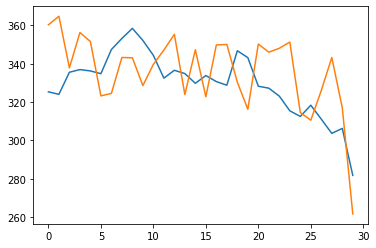

In [40]:
# quick compare of two models
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(lr_prediction)
plt.plot(svr_rbf_prediction)